In [1]:
import torch
from easy_transformer import EasyTransformer

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print(f"Using {device} device")
torch.set_grad_enabled(False)

model = EasyTransformer.from_pretrained('gpt2', device=device)

# Convenience function for decoding token
decode = model.tokenizer.decode

# Convenience function for encoding token
def encode(t):
    global model
    result = model.tokenizer.encode(t)
    if len(result) != 1:
        raise Exception(f"Not a single token: {t}")
    return result[0]

unembed = model.unembed.W_U.data
embed = model.embed.W_E.data
d_M = model.cfg.d_model
d_V = model.cfg.d_vocab

unembed_norm = torch.nn.functional.normalize(unembed, dim=0)

Using cpu device
Loading model: gpt2


Using pad_token, but it is not set yet.


Moving model to device:  cpu
Finished loading pretrained model gpt2 into EasyTransformer!


In [9]:
from sklearn.decomposition import PCA

transformed = PCA().fit_transform(unembed.T)
print(transformed.shape)

(50257, 768)


In [6]:
from sklearn.cluster import KMeans

cluster_indices = KMeans(4).fit_predict(unembed.T)

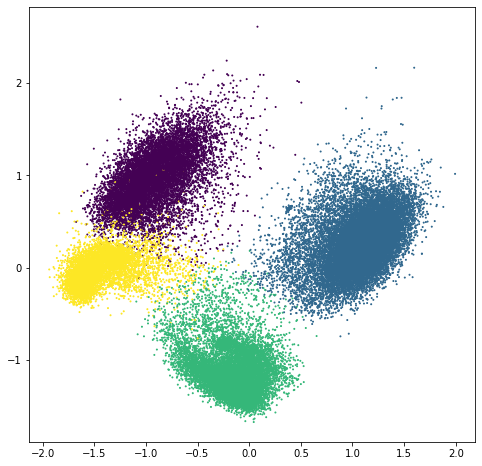

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(transformed[:,0], transformed[:,1], s=1, c=cluster_indices / 4)

<IPython.core.display.Javascript object>


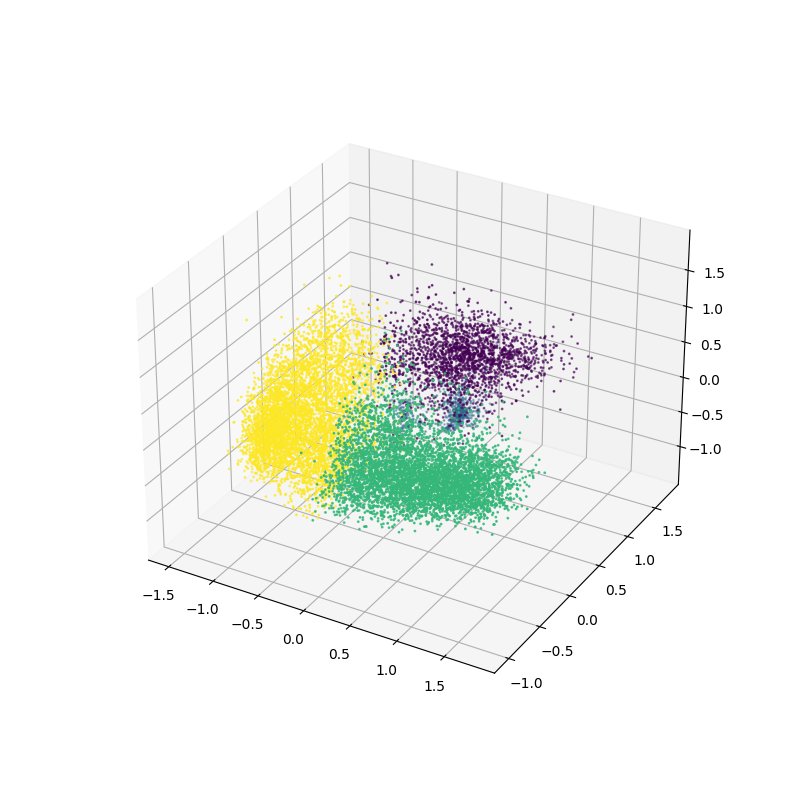

0  BB
0  MBA
0  PK
0  Patreon
0  SEE
0  STE
0  THEM
0  hrs
0  ie
1  0
1  124
1  1937
1  1978
1  25
1  250
1  252
1  318
2  Ad
2  Clown
2  Comb
2  Customers
2  Deputy
2  Drawn
2  Fisheries
2  Garage
2  Hmm
2  Investig
2  Lean
2  Neg
2  Opera
2  Parameters
2  Rockets
2  Sequence
2  Similarly
2  Studios
2  Suggest
2  Three
2  Trap
3  Andre
3  Bo
3  Deng
3  Ellison
3  McMahon
3  Northeast
3  Pandora
3  Sage
3  Salv
3  Sunday
3  Ug
3  Zed


In [39]:
%matplotlib notebook
cluster_of_interest = 2

plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
indices, = np.nonzero(cluster_indices == cluster_of_interest)
data2 = unembed[:,indices]
trans2 = PCA(3).fit_transform(data2.T)
cluster_indices2 = KMeans(4).fit_predict(data2.T)


import random
random.seed(12345)
values = []
for i in random.sample(range(len(indices)), k=50):
    values.append((cluster_indices2[i], decode(indices[i])))
values.sort()
for cluster, tok in values:
    print(cluster, tok)

ax.scatter(trans2[:,0], trans2[:,1], trans2[:,2], s=1, c=cluster_indices2 / 4)